## Create P-value plot
- It reads the data.
- Generate a datFrame.

In [47]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp
import numpy as np
%matplotlib inline

Read the csv file for lamin expression "lamin_ex_p_value.csv" and store the data in df.

In [117]:
infile = "lamin_ex_p_value.csv"
df = pd.read_csv(infile)

Calculate the P-value for  "WT" and "Lamin si", and "WT and "lamin over" 
Set alpha value to 5%

In [139]:
alpha = 0.05 
parm_1 = 'LamA/C siRNA'
parm_2 = 'LamA/C  overexpressed'
parm_3 = 'WT'
x = df[parm_1].dropna()
y = df[parm_3].dropna()
ttest1,pval1 = stats.ttest_ind(x, y)
print("this is P-value between {} and {}: {}".format(parm_1, parm_3, pval1))
print("this is T-value between {} and {}: {}".format(parm_1, parm_3, ttest1))

x = df[parm_2].dropna()
y = df[parm_3].dropna()
ttest2,pval2 = stats.ttest_ind(x, y)
print("this is P-value between {} and {}: {}".format(parm_2, parm_3, pval2))
print("this is T-value between {} and {}: {}".format(parm_2, parm_3, ttest2))


this is P-value between LamA/C siRNA and WT: 2.651164835320475e-18
this is T-value between LamA/C siRNA and WT: -12.728853554757176
this is P-value between LamA/C  overexpressed and WT: 1.3280861670616335e-08
this is T-value between LamA/C  overexpressed and WT: 6.686825301025793


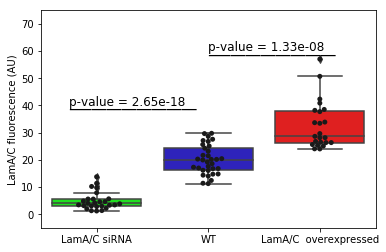

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
parm_1 = 'LamA/C siRNA'
parm_2 = 'LamA/C  overexpressed'
parm_3 = 'WT'
my_pal = {parm_1: "#00FF00", parm_2: "#FF0000", parm_3:"#180AD4"}
file= "lamin_ex_p_value.csv"
df= pd.read_csv(file)
columns = [parm_1, parm_3, parm_2]
df = df[columns]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal)
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(df), color=".1")
y_axis = "LamA/C fluorescence (AU)"
x_axis = ""
ax.set(xlabel=x_axis, ylabel=y_axis)
ax.text(1, 60, 'p-value = '+str(round(pval2,10)), fontsize=12)
ax.text(1, 60, '_________________', fontsize=15)
ax.text(-0.25, 40, 'p-value = '+str(round(pval1,20)) , fontsize=12)
ax.text(-0.25, 40, '_________________', fontsize=15)
ax.set_ylim(-5,75)
fig = ax.get_figure()
fig.savefig("boxplot_lamiAC.pdf")

          A         B         C         D
0  0.883507  0.860921  0.993867  0.097326
1  0.190081  0.000170  0.376005  0.695870
2  0.421952  0.819985  0.280407  0.052820
3  0.444358  0.950504  0.744712  0.978889
